In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

### Seaborn

* Matplotlib를 기반으로 만들어진 파이썬 라이브러리
* Matplotlib을 더 사용하기 쉽게 만들어진 강력한 라이브러리
* 공식 사이트 http://seaborn.pydata.org

### Seaborn에서만 제공되는 통계기반 plot

In [4]:
tips = sns.load_dataset('tips')
tips.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2


### 1. violinplot

바이올린처럼 생겼다고 해서 붙여진 이름
그래프의 x, y범위와 그에 따른 분포도를 함께 보여줌
1) 그래프 중간에 툭 튀어져 나온 부분을 주의깊게 살펴야 하고,  

2) 위, 아래 양 끝쪽 데이터의 분포도 논여겨 봐야한다.

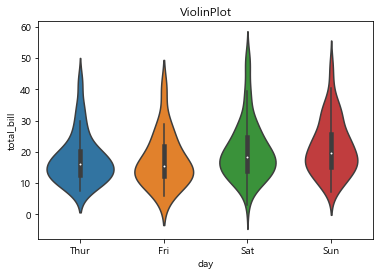

In [6]:
sns.violinplot(x = 'day', y = 'total_bill', data = tips)
plt.title('ViolinPlot')
plt.show()

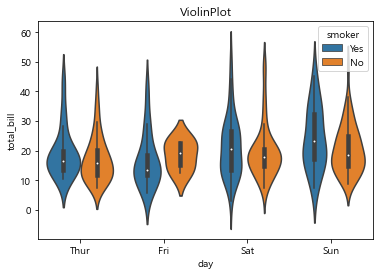

In [7]:
# hue 옵션
# legend가 자동으로 나오는 seaborn의 장점이다.

sns.violinplot(x = 'day', y = 'total_bill', data = tips, hue = 'smoker')
plt.title('ViolinPlot')
plt.show()

In [8]:
# sns.violinplot?

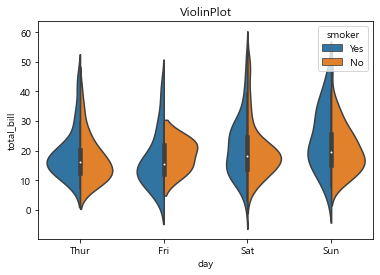

In [9]:
sns.violinplot(x = 'day', y = 'total_bill',
               data = tips,
               hue = 'smoker',
               split = True)
plt.title('ViolinPlot')
plt.show()

# split = True ==> yes와 no를 붙여서 보여준다

### 2. countplot()

sns의 countplot함수는   
기존 pandas의 함수 value_counts() 함수와 동일한 원리가 내포되어 있다.

value_counts()은 카테고리컬한 컬럼에 적합하다. 숫자형 컬럼에는 효과적이지 않다.

또한, value_counts()는 내림차순으로 자동으로 출력된다.

<AxesSubplot:>

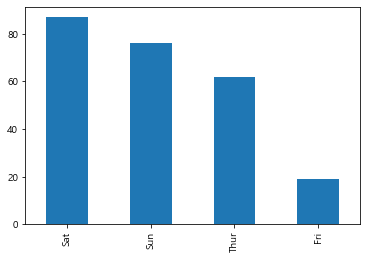

In [14]:
tips['day'].value_counts(). plot(kind = 'bar')

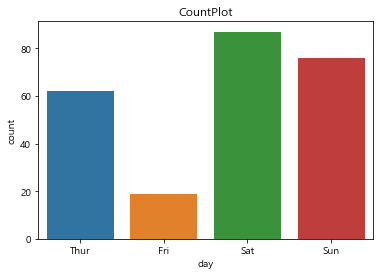

In [16]:
sns.countplot(tips['day'])
plt.title('CountPlot')
plt.show()

### 3. lmplot

컬럼간의 선형적인 관계를 나타내는 그래프

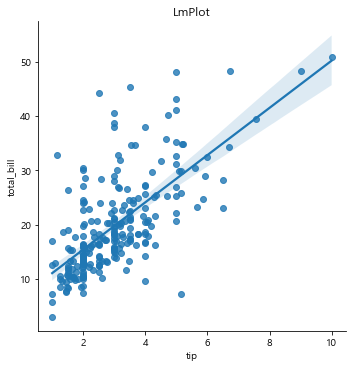

In [19]:
'''
컬럼들간의 선형관계를 나타낸다는 의미는
직선상에 데이터들이 근접하게 붙어서 나와야 한다는 의미이다.

지금은 선상에 데이터들이 다소 넓게 퍼져서 나타난다.
온갖 데이터들이 섞여져서 그렇다.
성별, 요일, 사이즈, 타임...

hue옵션(그룹핑을 사용해서 다중선형관계를 조금 더 디테일하게 표시)
'''
sns.lmplot(x = 'tip', y = 'total_bill', data  = tips)
plt.title('LmPlot')
plt.show()

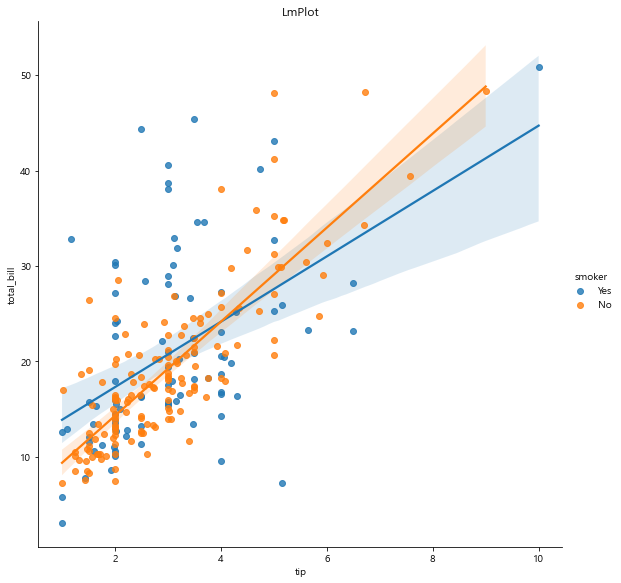

In [21]:
# tip과 total_bill의 선형관계에 충실한 것은 비흡연자이고, 차이가 많이 나는 것은 흡연자이다.
sns.lmplot(x = 'tip', y = 'total_bill', data  = tips, hue = 'smoker', height = 8)
plt.title('LmPlot')
plt.show()

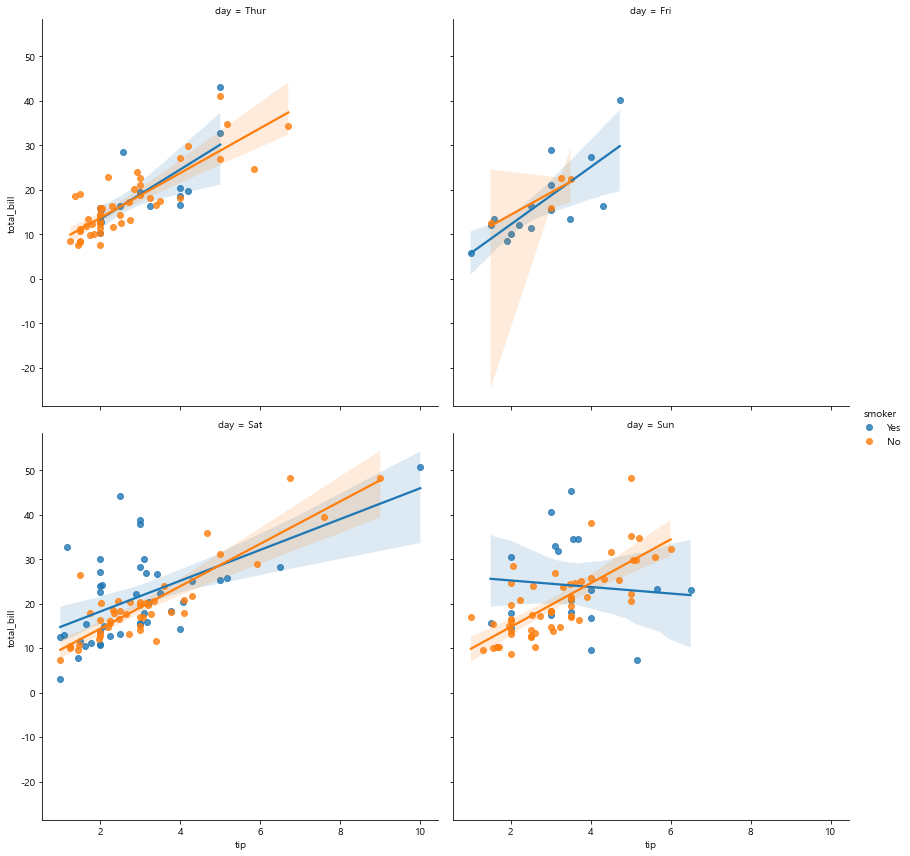

In [24]:
# col옵션으로 분할해서 확인
# col_wrap =2  >>> 옆으로 두 개씩 보여주고 넘어가라.
# 요일별 선형관계를 다시 디테일하게 살펴볼 수 있다.
sns.lmplot(x = 'tip', y = 'total_bill', data  = tips, 
                                        hue = 'smoker', 
                                        col = 'day',
                                        col_wrap= 2,
                                        height = 6)
# plt.title('LmPlot')
plt.show()

# 목요일 : 비흡연자는 선형관계 유지, 흡연자는 어느정도 이상의 팁은 잘 내지 않음
# 금요일 : 비흡연자는 데이터가 적음, 흡연자는 위와 마찬가지로 어느정도 이상의 팁은 내지 않음
# 토요일 : 비흡연자는 선형, 흡연자는 선형이 아님

### 4. relplot

column간 상관관계  
단, 선형관계를 따로 그려주지는 않는다.

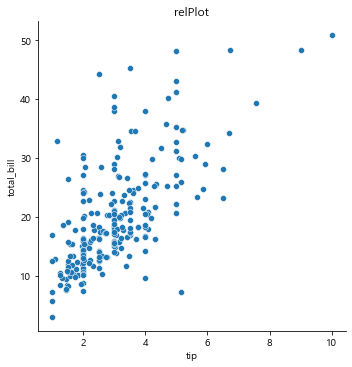

In [25]:
#total_bill과 tip컬럼의 상관관계를 알 수 있는 그래프이다.
sns.relplot(x = 'tip', y = 'total_bill', data  = tips)
plt.title('relPlot')
plt.show()

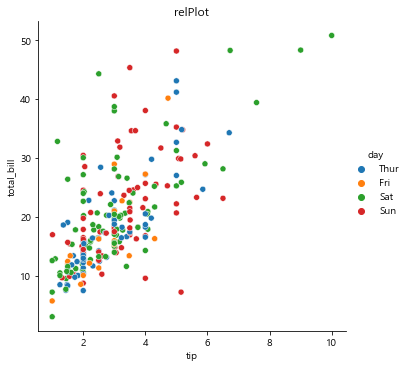

In [27]:
# sns.relplot(x = 'tip', y = 'total_bill', data  = tips, hue = 'smoker')
sns.relplot(x = 'tip', y = 'total_bill', data  = tips, hue = 'day')
plt.title('relPlot')
plt.show()

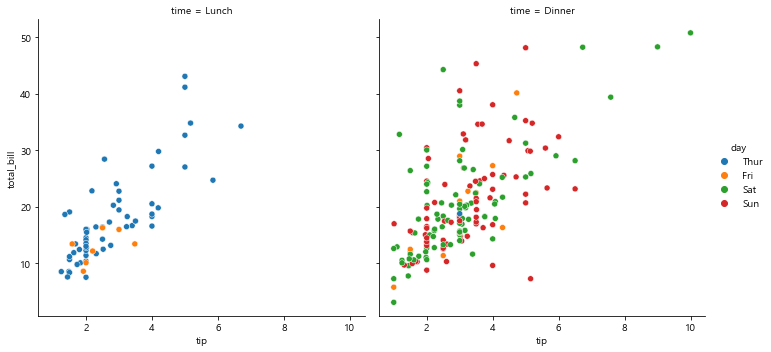

In [29]:
sns.relplot(x = 'tip', y = 'total_bill', data  = tips, hue = 'day', col = 'time')
plt.show()

#### row, column에 표기할 데이터를 다시 명시

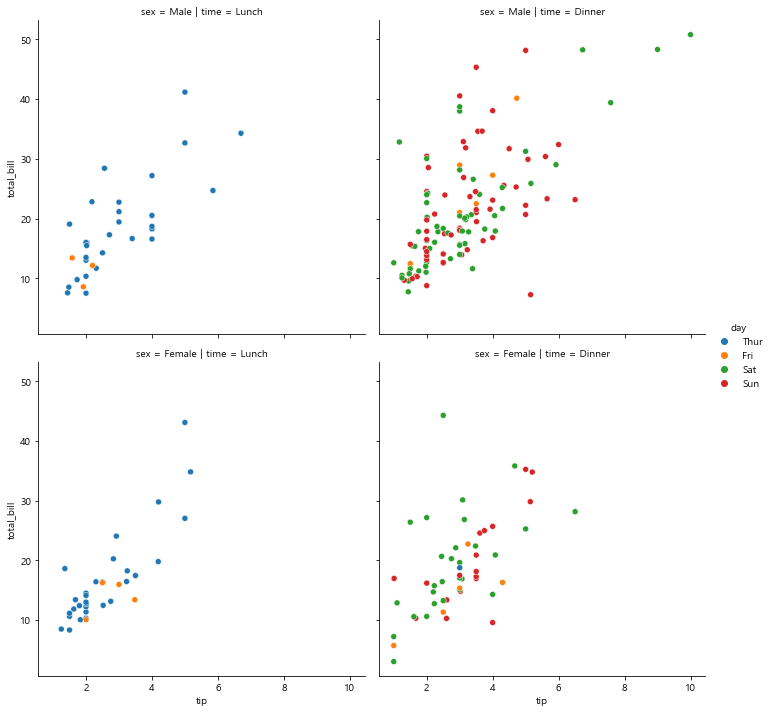

In [33]:
sns.relplot(x = 'tip', y = 'total_bill', data  = tips, hue = 'day', col = 'time', row = 'sex')
plt.show()


'''
남성들이 비교적 total_bill만큼 tip을 내지 않는다.
이상치가 남성이 더 많다.

'''

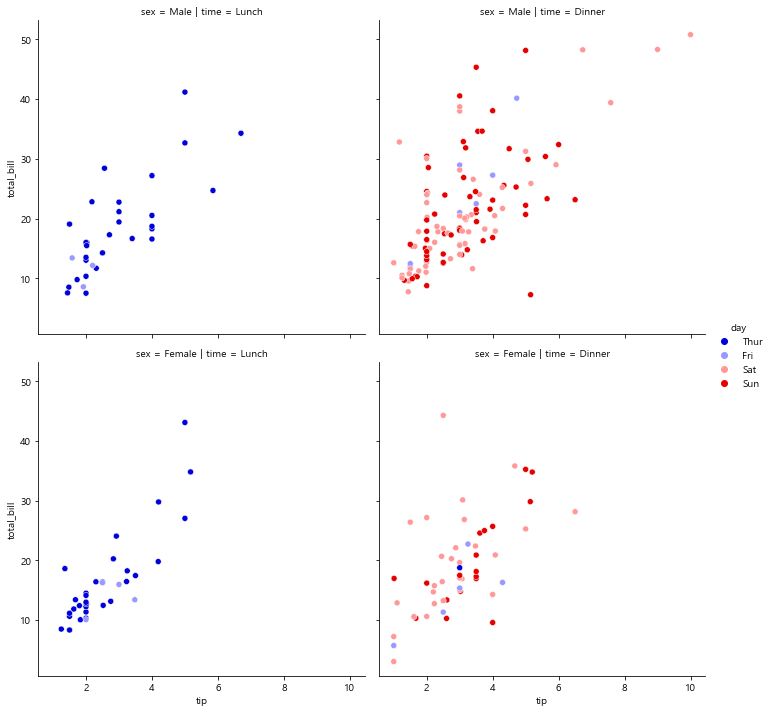

In [37]:
sns.relplot(x = 'tip', y = 'total_bill', data  = tips, hue = 'day', col = 'time', row = 'sex', palette='seismic')
plt.show()


### matplot 활용한 그래프를 Seaborn으로

`matplot의 기본 색상보다 seaborn은 스타일링에 크게 신경쓰지 않아도 default컬러가 이쁘게 조합해 준다 
`

### 5. barplot

Text(0.5, 1.0, 'Subject')

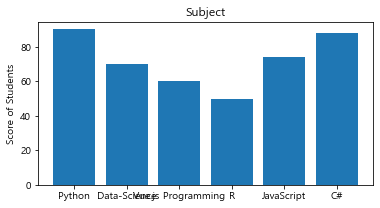

In [38]:
x = ['Python','Data-Science', 'Vue.js Programming','R', 'JavaScript', 'C#']
y = [90, 70, 60, 50, 74, 88]


plt.figure(figsize=(6,3))
plt.bar(x,y)
# plt.bar(x,y,align='center', alpha=0.7, color='red')
plt.ylabel('Score of Students')
plt.title('Subject')

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


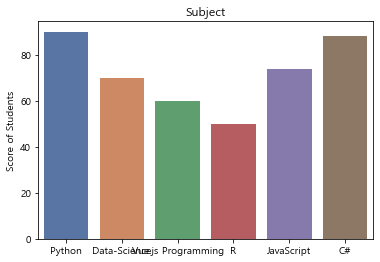

In [42]:
sns.barplot(x, y, palette='deep')
plt.ylabel('Score of Students')
plt.title('Subject')
plt.show()

###  컬러 팔레트

자세한 컬러 팔레트는 [공식 도큐먼트](https://seaborn.pydata.org/tutorial/color_palettes.html) 참고 합니다.  
[팔레트 작성 참고사이트](https://data101.oopy.io/4233e3f0-9ca1-41ad-bdd9-b3a26f7a2160)는 이곳도 참고.

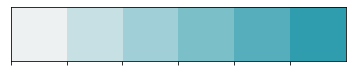

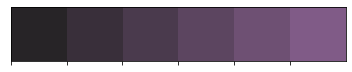

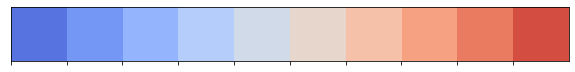

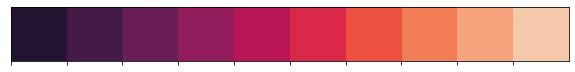

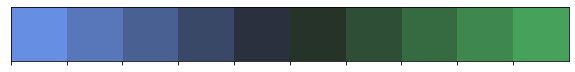

In [137]:
sns.palplot(sns.light_palette((210,90,60),input="husl"))
sns.palplot(sns.dark_palette('muted purple',input="xkcd"))
bbg = sns.color_palette("BrBG",10)
sns.palplot(sns.color_palette("coolwarm",10))
rocket = sns.palplot(sns.color_palette("rocket", 10))
sns.palplot(sns.diverging_palette(255,133,l=60, n=10, center='dark'))

<AxesSubplot:xlabel='tip', ylabel='total_bill'>

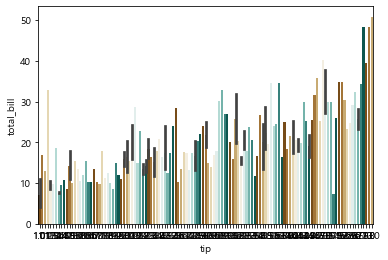

In [138]:
# sns.barplot(x = 'tip', y = 'total_bill', data = tips)
# sns.barplot(x = 'tip', y = 'total_bill', data = tips, palette='Reds')
# sns.barplot(x = 'tip', y = 'total_bill', data = tips, palette= 'coolwarm')
sns.barplot(x = 'tip', y = 'total_bill', data = tips, palette= bbg)

In [58]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### 6. catplot

Categorical plots를 모두 그릴 수 있음

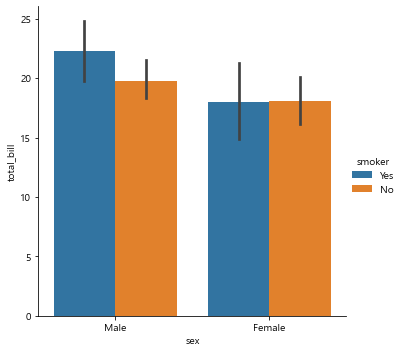

In [60]:
# 남, 여 흡연, 비흡연자들의 '평균' 음식 지불값을 나타내는 그래프이다.
# 중간의 검정선의 의미는 선까지 데이터가 존재한다는 의미이다.

sns.catplot(x = 'sex', y = 'total_bill', hue = 'smoker', data = tips, kind = 'bar')
plt.show()

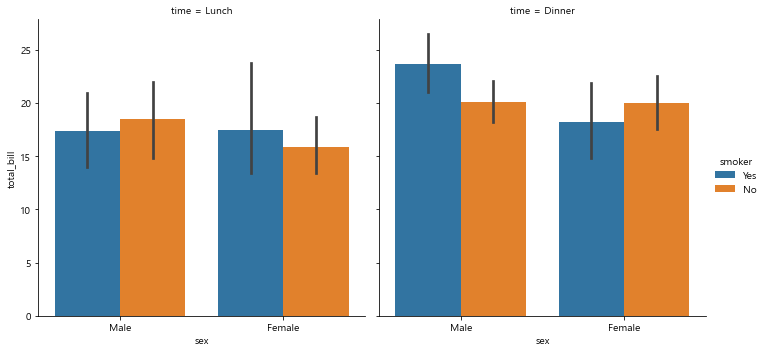

In [61]:
sns.catplot(x = 'sex', 
            y = 'total_bill', 
            hue = 'smoker', 
            data = tips, 
            kind = 'bar',
            col = 'time')
plt.show()

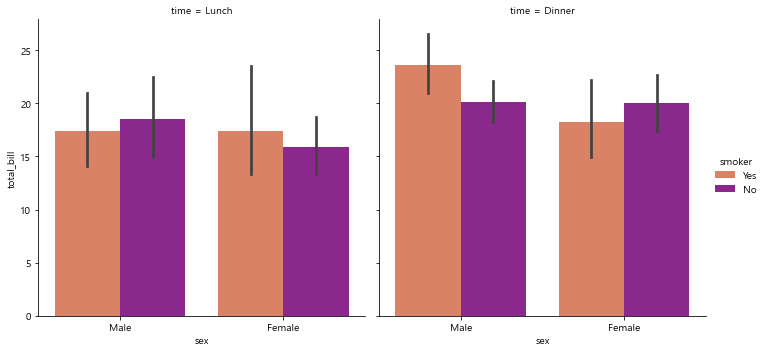

In [69]:
sns.catplot(x = 'sex', 
            y = 'total_bill', 
            hue = 'smoker', 
            data = tips, 
            kind = 'bar',
            col = 'time',
            palette= 'plasma_r')
plt.show()

### 7. histogram distplot()

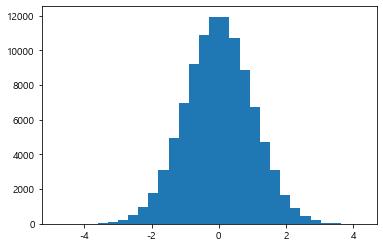

In [82]:
N = 100000
bins = 30
x = np.random.randn(N)

plt.hist(x, bins = bins)
plt.show()

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

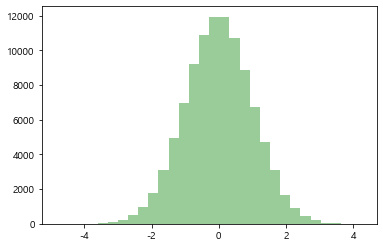

In [89]:
sns.distplot(x, bins = bins, kde = False, color = 'g')

<AxesSubplot:ylabel='Density'>

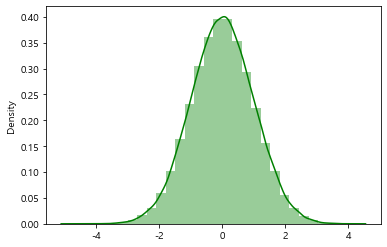

In [90]:
sns.distplot(x, bins = bins, kde = True, color = 'g')

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

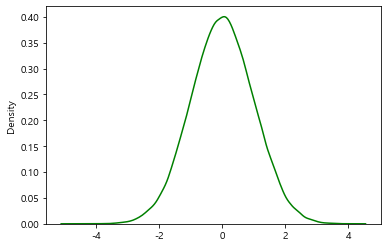

In [92]:
sns.distplot(x, bins = bins, kde = True, color = 'g', hist = False)

### 8. heatmap

상관관계가 1에 가까울 수록 진하게 표시된다.  
상관계수는 일반적으로 <br>
값이 -1.0 ~ -0.7 이면, 강한 음적 상관관계<br>
값이 -0.7 ~ -0.3 이면, 뚜렷한 음적 상관관계<br>
값이 -0.3 ~ -0.1 이면, 약한 음적 상관관계<br>
값이 -0.1 ~ +0.1 이면, 없다고 할 수 있는 상관관계<br>
값이 +0.1 ~ +0.3 이면, 약한 양적 상관관계<br>
값이 +0.3 ~ +0.7 이면, 뚜렷한 양적 상관관계<br>
값이 +0.7 ~ +1.0 이면, 강한 양적 상관관계로 해석된다.

In [94]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<AxesSubplot:>

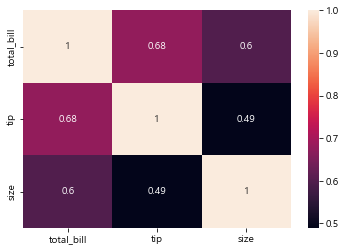

In [96]:
sns.heatmap(tips.corr(), annot = True)

In [99]:
titanic = sns.load_dataset('titanic')
titanic.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False


In [102]:
'''
컬럼간의 관계들이 다소 복잡해서
데이터프레임으로는 상관관계를 파악하기가 다소 어렵다.
이 때,corr()함수를 heatmap()안에 넣어서 활용한다.
'''

titanic.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


<AxesSubplot:>

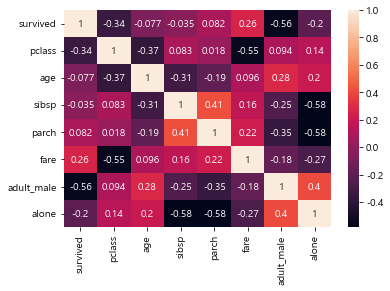

In [105]:
sns.heatmap(titanic.corr(), annot = True)

In [ ]:
'''
생존율에 sibsp,parch 상관관계가 원래는 낮게 나와야 한다.
정확한 지표를 보기 위해서는 annot = True, abs를 활용해야한다.
'''

<AxesSubplot:>

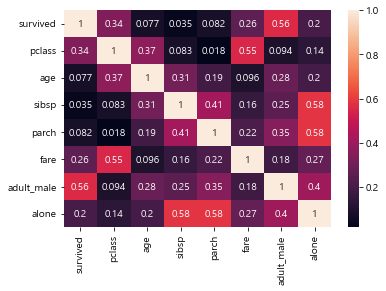

In [107]:
sns.heatmap(abs(titanic.corr()), annot = True)

<AxesSubplot:>

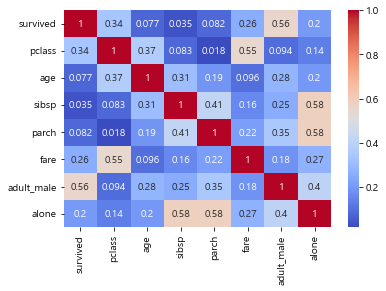

In [109]:
'''
타이타닉 데이터는 컬럼간의 상관관계를 정확하게 분석하기에 그다지 좋은 데이터는 아니다.
선형관계를 가지는 데이터를 상관관계로 보는 것이 효율적이다.
매출액, 주택가격과 같은 연속적인 숫자 데이터를 가지는 것을 나타내는 시각화 그래프가 heatmap이다.
'''

sns.heatmap(abs(titanic.corr()), annot = True, cmap = 'coolwarm')

In [115]:
'''
연도별, 월별 항공기 탑승 승객의 추이...
'''

flights = sns.load_dataset('flights')
flights = flights.pivot_table(index = 'month', columns = 'year', values = 'passengers')
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


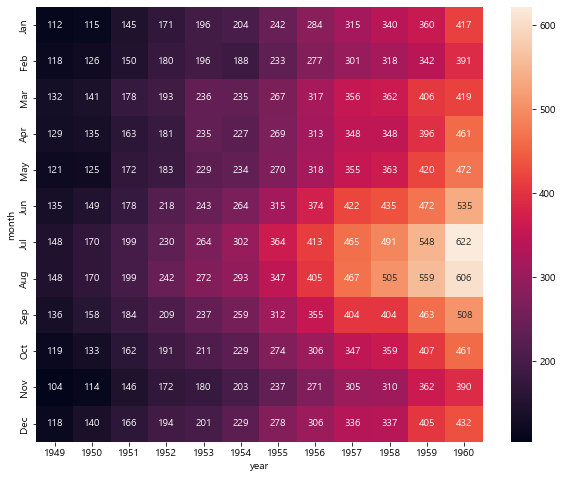

In [120]:
plt.figure(figsize=(10, 8))
sns.heatmap(flights, annot = True, fmt = 'd')
plt.show()



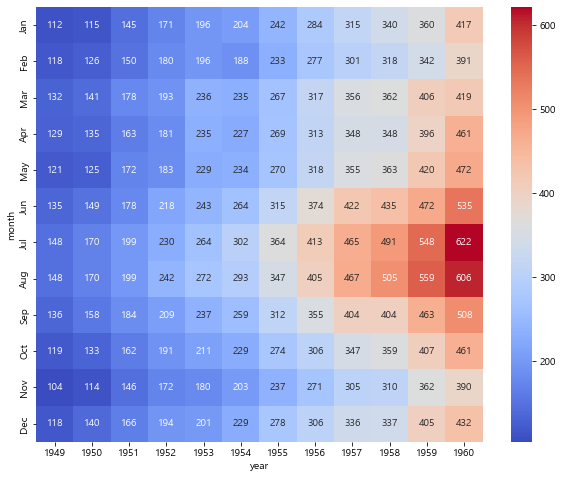

In [125]:
plt.figure(figsize=(10, 8))
sns.heatmap(flights, annot = True, fmt = 'd', cmap = 'coolwarm')
plt.show()

### 9. pairplot

상관관계를 볼 수 있는 대표적인 그래프

In [126]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Figure size 432x288 with 0 Axes>

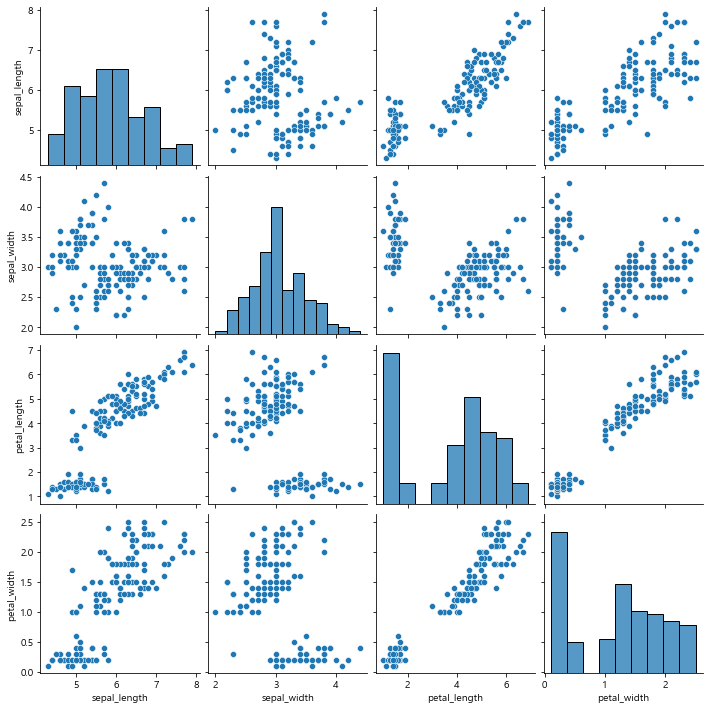

In [128]:
plt.figure(figsize=(6, 4))
sns.pairplot(iris)
plt.show()

<Figure size 432x288 with 0 Axes>

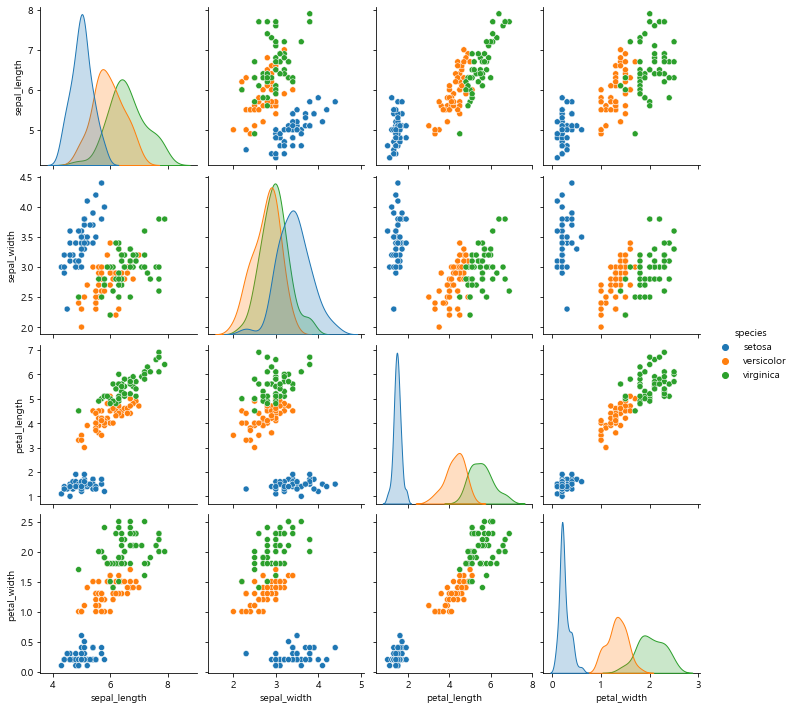

In [129]:
plt.figure(figsize=(6, 4))
sns.pairplot(iris, hue = 'species')
plt.show()

#### 10. swarmplot

swarmplot은 boxplot과 함께 사용되어서  
이상치값들이 어디에 어떻게 분포되어있는지와  
50% 안에 들어가 있는 값들의 분포도 좀 더 직관적으로 확인가능

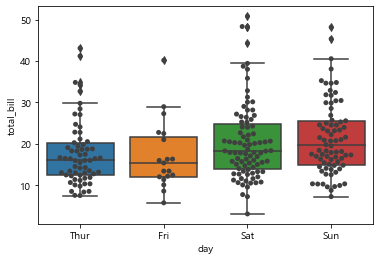

In [132]:
sns.boxplot(x = 'day', y = 'total_bill', data = tips)
sns.swarmplot(x = 'day', y = 'total_bill', data = tips, color='.25')
plt.show()



'''
박스플롯을 합치면 이상치 값들을 좀 더 정확하게 볼 수 있다.
'''

#### 11. FacetGrid

다양한 범주형 값을 가지는 데이터를 시각화하는데 좋은 방법  

In [133]:
titanic = sns.load_dataset('titanic')
titanic.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False


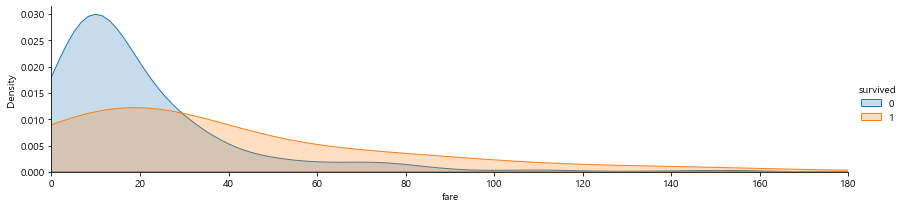

In [136]:
facet = sns.FacetGrid(titanic, hue="survived",aspect=4)
facet.map(sns.kdeplot,'fare',shade= True)
facet.set(xlim=(0, titanic['fare'].max()))
facet.add_legend()
plt.xlim(0,180)
plt.show()

In [ ]:
'''
구간을 잘 나눠는 것이 성능에 엄청나게 큰 영향을 준다.
'''

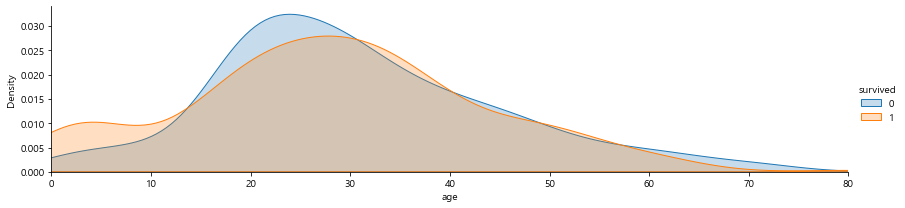

In [135]:
facet = sns.FacetGrid(titanic, hue="survived",aspect=4)
facet.map(sns.kdeplot,'age',shade= True)
facet.set(xlim=(0, titanic['age'].max()))
facet.add_legend()
 
plt.show()